# Software Defect Detection


## 1. Introduction

Software defect detection is an application area that employs machine learning models for automatically identifying defective parts in programs.

In this assignment you will explore various classifiers with multiple datasets. The purpose is to measure the performance of the following well-established algorithms in software defect detection tasks.


### Classifiers
The classifiers to be studied are:
* $C_1$: Logistic Regression
* $C_2$: Perceptron
* $C_3$: Support Vector Machines (with linear &amp; RBF kernel)
* $C_4$: Decision Tree
* $C_5$: Random Forests
* $C_6$: Feed-forward Neural Network


### Datasets
The classification performance of the abovementioned algorithm will be studied in a collection of 3 datasets on software defect detection. The datasets are:

* `jm1` (Description [here](https://www.openml.org/search?type=data&status=active&id=1053))
* `mc1` (Description [here](https://www.openml.org/search?type=data&status=active&id=1056))
* `pc3` (Description [here](https://www.openml.org/search?type=data&status=active&id=1050))

**All datasets are provided with the assignment in the present compressed file.**

There cases of missing values in the datasets. These cases should be addressed by removing the **rows** with missing values.


## 2. Experiments

You will use 80% of the datasets for training and 20% for testing by applying the 5-fold cross validation technique. The algorithms will be evaluated by measuring the values of the four following well-established metrics:
* $M_1$: Accuracy
* $M_2$: F1-score
* $M_3$: G-Mean score
* $M_4$: Fit time

Repeat your experiments with different features' normalization methods:
* $N_1$: No normalization (use raw features)
* $N_2$: Min-max normalization
* $N_3$: Feature Standardization



## 3. Deliverable & Deadline

You will work in pairs according to your preferences.

The deliverable will be a notebook, using both surnames as a file name. This file should include the code and the results for each one of the 3 datasets. Both students of a team must upload the same file into the e-learning platform. **Only one file per pair will be checked. So, if you upload different versions, then one of them will not be examined. You are free to use any Python library, even if it is not a part of Anaconda3. However, in the latter case, please make sure that you mention the appropriate conda or pip command for installing the library.**

**For each dataset, your notebook should present:**

* 4 bar plots that will compare the performance ($M1$, $M2$, $M3$, and $M4$) of the six classifiers ($C1$, $C2$, $C3$, $C4$, $C5$, and $C6$) for the cases $N_1$, $N_2$, and $N_3$ (please consult the example in the figure below).
* A discussion on the performance of the classifiers.

**The deadline is 30/01/2024. NO DEADLINE EXTENSION WILL BE GIVEN.**

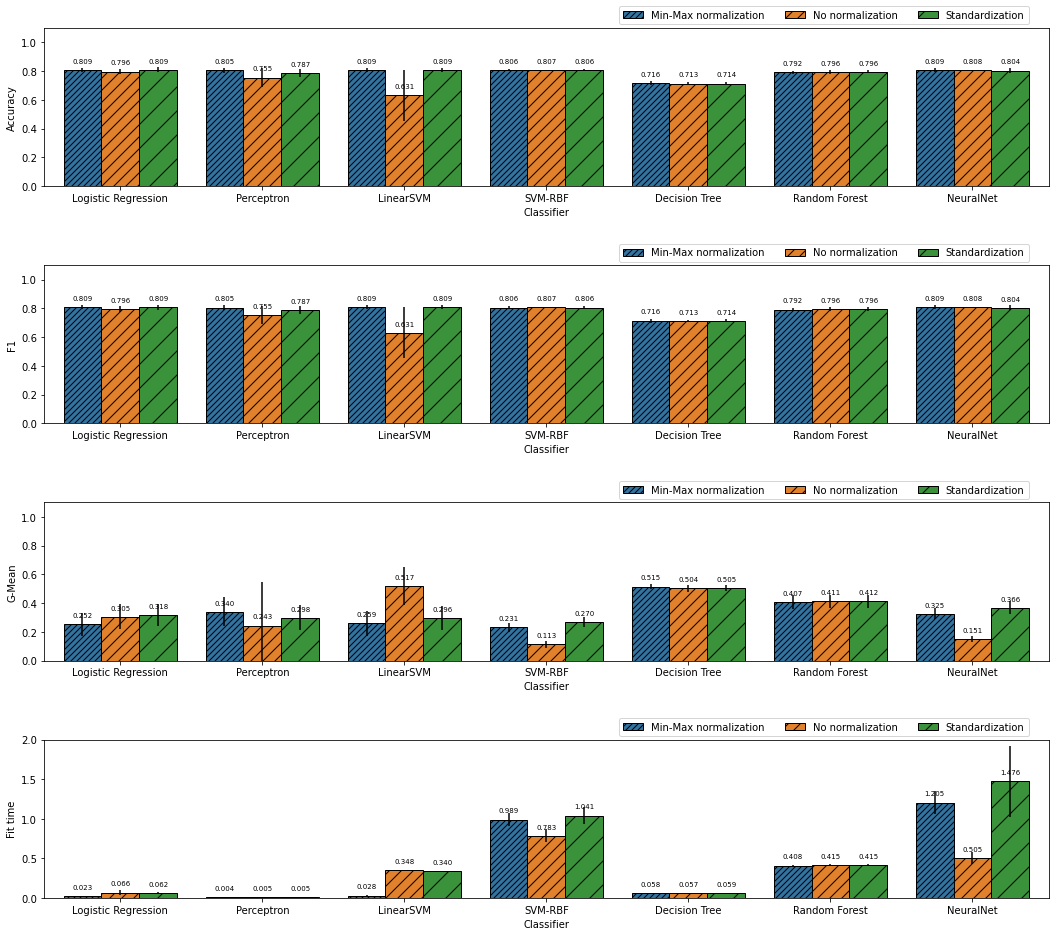

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
set1 = pd.read_csv('jm1.csv',sep=",")
set1.replace('?', float(0), inplace=True)

Y = np.array(set1.iloc[:, 21].astype(int))

X = np.array(set1.iloc[:, :21])



In [2]:
import warnings

from sklearn.model_selection import cross_validate, ShuffleSplit
from sklearn.metrics import make_scorer, f1_score, accuracy_score, balanced_accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier



warnings.filterwarnings("ignore")



scorers = {
    'accuracy_score': make_scorer(accuracy_score),
    'balanced_accuracy_score': make_scorer(balanced_accuracy_score),
    'f1_score': make_scorer(f1_score, average='weighted')
}



cv= 5 

cv_results = cross_validate(LogisticRegression(solver='liblinear',max_iter=1000), X, Y, cv=cv, scoring=scorers, return_train_score=True)
cv_Results_perceptron = cross_validate(Perceptron(),X,Y,cv=cv,scoring=scorers,return_train_score = True)
cv_results_svm = cross_validate(SVC(kernel="linear",max_iter = 10000),X,Y,cv=cv,scoring=scorers,return_train_score = True)
cv_results_svm_rbf = cross_validate(SVC(kernel="rbf",max_iter = 10000),X,Y,cv=cv,scoring=scorers,return_train_score = True)
cv_results_dec_tree = cross_validate(DecisionTreeClassifier(), X, Y, cv=cv,scoring=scorers,return_train_score = True)
cv_results_random_forest = cross_validate(RandomForestClassifier(), X, Y, cv=cv,scoring=scorers,return_train_score = True)
cv_results_ffn = cross_validate(MLPClassifier(),X,Y,cv=cv,scoring=scorers,return_train_score=True)

print(cv_results['fit_time'].mean())


print("Accuracy:", cv_results['test_accuracy_score'].mean())
print("Balanced Accuracy:", cv_results['test_balanced_accuracy_score'].mean())
print("F1:", cv_results['test_f1_score'].mean())

print("Accuracy:", cv_Results_perceptron['test_accuracy_score'].mean())
print("Balanced Accuracy:", cv_Results_perceptron['test_balanced_accuracy_score'].mean())
print("F1:",  cv_Results_perceptron['test_f1_score'].mean())

print("Accuracy:", cv_results_svm['test_accuracy_score'].mean())
print("Balanced Accuracy:", cv_results_svm['test_balanced_accuracy_score'].mean())
print("F1:", cv_results_svm['test_f1_score'].mean())


print("Accuracy:", cv_results_svm_rbf['test_accuracy_score'].mean())
print("Balanced Accuracy:", cv_results_svm_rbf['test_balanced_accuracy_score'].mean())
print("F1:", cv_results_svm_rbf['test_f1_score'].mean())


print("Accuracy:", cv_results_ffn['test_accuracy_score'].mean())
print("Balanced Accuracy:", cv_results_ffn['test_balanced_accuracy_score'].mean())
print("F1:", cv_results_ffn['test_f1_score'].mean())

1.3196092605590821
Accuracy: 0.8075333027101514
Balanced Accuracy: 0.5403052966571534
F1: 0.7515758859496309
Accuracy: 0.806614607257694
Balanced Accuracy: 0.5050986226390825
F1: 0.7246646479550944
Accuracy: 0.43050068902158933
Balanced Accuracy: 0.48645098123080344
F1: 0.37154603547517906
Accuracy: 0.8066146072576942
Balanced Accuracy: 0.5051103991508931
F1: 0.7249445767642706
Accuracy: 0.7109784106568673
Balanced Accuracy: 0.5704081224646719
F1: 0.7067899501580296


In [3]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([('scaler', StandardScaler()), ('logistic', LogisticRegression(solver='liblinear'))])
pipePerceptron = Pipeline([('scaler', StandardScaler()), ('perceptron', Perceptron())])
pipeSvm = Pipeline([ ('scaler', StandardScaler()), ('svm', SVC(kernel='linear',max_iter = 10000))])
pipeSvmRBF = Pipeline([ ('scaler', StandardScaler()), ('svm', SVC(kernel='rbf',max_iter=10000))])
pipeTree = Pipeline([('scaler', StandardScaler()), ('classifier', DecisionTreeClassifier())])
pipeRforest = Pipeline([('scaler', StandardScaler()), ('classifier', RandomForestClassifier())])
pipeMLP = Pipeline([('scaler', StandardScaler()), ('classifier', MLPClassifier())])  
                    
cv_resultsStandard = cross_validate(pipe, X, Y, cv=cv, scoring=scorers, return_train_score=True)
cv_resultsStandardPerceptron = cross_validate(pipePerceptron, X, Y, cv=cv, scoring=scorers, return_train_score=True)
cv_resultsStandardSVM = cross_validate(pipeSvm,X,Y,cv=cv,scoring=scorers,return_train_score = True)
cv_resultsStandardSVMrbf = cross_validate(pipeSvmRBF,X,Y,cv=cv,scoring=scorers,return_train_score = True)
cv_resultsStandardDecTree = cross_validate(pipeTree,X,Y,cv=cv,scoring=scorers,return_train_score = True)
cv_resultsStandardRFor = cross_validate(pipeRforest,X,Y,cv=cv,scoring=scorers,return_train_score = True)
cv_resultsStandardMLP = cross_validate(pipeMLP,X,Y,cv=cv,scoring=scorers,return_train_score=True)

print("Accuracy:", cv_resultsStandard['test_accuracy_score'].mean())
print("Balanced Accuracy:", cv_resultsStandard['test_balanced_accuracy_score'].mean())
print("F1:", cv_resultsStandard['test_f1_score'].mean())
                           
print("Accuracy:", cv_resultsStandardPerceptron['test_accuracy_score'].mean())
print("Balanced Accuracy:", cv_resultsStandardPerceptron['test_balanced_accuracy_score'].mean())
print("F1:", cv_resultsStandardPerceptron['test_f1_score'].mean())                  


print("Accuracy:", cv_resultsStandardSVM['test_accuracy_score'].mean())
print("Balanced Accuracy:", cv_resultsStandardSVM['test_balanced_accuracy_score'].mean())
print("F1:", cv_resultsStandardSVM['test_f1_score'].mean())


print("Accuracy:", cv_resultsStandardSVMrbf['test_accuracy_score'].mean())
print("Balanced Accuracy:", cv_resultsStandardSVMrbf['test_balanced_accuracy_score'].mean())
print("F1:", cv_resultsStandardSVMrbf['test_f1_score'].mean())



print("Accuracy:", cv_resultsStandardMLP['test_accuracy_score'].mean())
print("Balanced Accuracy:", cv_resultsStandardMLP['test_balanced_accuracy_score'].mean())
print("F1:", cv_resultsStandardMLP['test_f1_score'].mean())

Accuracy: 0.8086357372531007
Balanced Accuracy: 0.542791609555275
F1: 0.753485267089729
Accuracy: 0.7540652273771246
Balanced Accuracy: 0.5172895865198901
F1: 0.7220427773982747
Accuracy: 0.8068902158934315
Balanced Accuracy: 0.503112535930883
F1: 0.7230630988488141
Accuracy: 0.8059715204409738
Balanced Accuracy: 0.5285312281222352
F1: 0.7436180749251307
Accuracy: 0.8083601286173632
Balanced Accuracy: 0.5626471827593853
F1: 0.7647450123251025


In [4]:
pipeMinMax = Pipeline([('scaler', MinMaxScaler()), ('logistic', LogisticRegression(solver='liblinear'))])
pipeMinMaxPerceptron = Pipeline([('scaler', MinMaxScaler()), ('perceptron', Perceptron())])
pipeMinMaxSVM = Pipeline([('scaler', MinMaxScaler()), ('svm',SVC(kernel='linear',max_iter = 10000))])
pipeMinMaxSVMRBF = Pipeline([('scaler', MinMaxScaler()), ('svm',SVC(kernel='rbf',max_iter = 10000))])
pipeMinMaxDecTree = Pipeline([('scaler', MinMaxScaler()), ('classifier', DecisionTreeClassifier())])
pipeMinMaxRForest = Pipeline([('scaler', MinMaxScaler()), ('classifier', RandomForestClassifier())])
pipeMinMaxMLP = Pipeline([('scaler', MinMaxScaler()), ('classifier', MLPClassifier())])

cv_resultsMinMax = cross_validate(pipeMinMax, X, Y, cv=cv, scoring=scorers, return_train_score=True)
cv_resultsMinMaxPerc = cross_validate(pipeMinMaxPerceptron, X, Y, cv=cv, scoring=scorers, return_train_score=True)
cv_resultsMinMaxSVM = cross_validate(pipeMinMaxSVM,X,Y,cv=cv,scoring=scorers,return_train_score=True)
cv_resultsMinMaxSVMRBF = cross_validate(pipeMinMaxSVMRBF,X,Y,cv=cv,scoring=scorers,return_train_score=True)
cv_resultsMinMaxDecTree = cross_validate(pipeMinMaxDecTree,X,Y,cv=cv,scoring = scorers,return_train_score=True)
cv_resultsMinMaxRFor = cross_validate(pipeMinMaxRForest,X,Y,cv=cv,scoring = scorers,return_train_score=True)
cv_resultsMinMaxMLP = cross_validate(pipeMinMaxMLP,X,Y,cv=cv,scoring=scorers,return_train_score=True)

print("Accuracy:", cv_resultsMinMax['test_accuracy_score'].mean())
print("Balanced Accuracy:", cv_resultsMinMax['test_balanced_accuracy_score'].mean())
print("F1:", cv_resultsMinMax['test_f1_score'].mean())

print("Accuracy:", cv_resultsMinMaxPerc['test_accuracy_score'].mean())
print("Balanced Accuracy:", cv_resultsMinMaxPerc['test_balanced_accuracy_score'].mean())
print("F1:", cv_resultsMinMaxPerc['test_f1_score'].mean())

print("Accuracy:", cv_resultsMinMaxSVM['test_accuracy_score'].mean())
print("Balanced Accuracy:", cv_resultsMinMaxSVM['test_balanced_accuracy_score'].mean())
print("F1:", cv_resultsMinMaxSVM['test_f1_score'].mean())

print("Accuracy:", cv_resultsMinMaxSVMRBF['test_accuracy_score'].mean())
print("Balanced Accuracy:", cv_resultsMinMaxSVMRBF['test_balanced_accuracy_score'].mean())
print("F1:", cv_resultsMinMaxSVMRBF['test_f1_score'].mean())

print("Accuracy:", cv_resultsMinMaxMLP['test_accuracy_score'].mean())
print("Balanced Accuracy:", cv_resultsMinMaxMLP['test_balanced_accuracy_score'].mean())
print("F1:", cv_resultsMinMaxMLP['test_f1_score'].mean())

Accuracy: 0.8087276067983463
Balanced Accuracy: 0.528053404113726
F1: 0.7434313328115485
Accuracy: 0.8082682590721175
Balanced Accuracy: 0.5673993846573301
F1: 0.7599922799538044
Accuracy: 0.8065227377124483
Balanced Accuracy: 0.5010829296314989
F1: 0.7211762535163035
Accuracy: 0.8057877813504822
Balanced Accuracy: 0.5204717212533527
F1: 0.7378288036605029
Accuracy: 0.8074414331649059
Balanced Accuracy: 0.5442267186433032
F1: 0.7541590302722548


In [22]:
#Set2 Raw Data
set2 = pd.read_csv('mc1.csv',sep=",")

Y2 = np.array(set2.iloc[:, 38].astype(int))
X2 = np.array(set2.iloc[:,:38])


cv= 5 

cv_results2 = cross_validate(LogisticRegression(solver='liblinear',max_iter=1000), X2, Y2, cv=cv, scoring=scorers, return_train_score=True)
cv_results2Perc = cross_validate(Perceptron(), X2, Y2, cv=cv, scoring=scorers, return_train_score=True)
cv_results2SVM = cross_validate(SVC(kernel="linear",max_iter = 500),X2,Y2,cv=cv,scoring=scorers,return_train_score = True)
cv_results2SVMrbf = cross_validate(SVC(kernel="rbf",max_iter = 500),X2,Y2,cv=cv,scoring=scorers,return_train_score = True)
cv_results2DecTree = cross_validate(DecisionTreeClassifier(), X2, Y2, cv=cv,scoring=scorers,return_train_score = True)
cv_results2RFor = cross_validate(RandomForestClassifier(),X2,Y2,cv=cv,scoring=scorers,return_train_score=True)
cv_results2MLP = cross_validate(MLPClassifier(),X2,Y2,cv=cv,scoring=scorers,return_train_score= True )

# print(cv_results)
print("Accuracy:", cv_results2['test_accuracy_score'].mean())
print("Balanced Accuracy:", cv_results2['test_balanced_accuracy_score'].mean())
print("F1:", cv_results2['test_f1_score'].mean())

print("Accuracy:", cv_results2Perc['test_accuracy_score'].mean())
print("Balanced Accuracy:", cv_results2Perc['test_balanced_accuracy_score'].mean())
print("F1:", cv_results2Perc['test_f1_score'].mean())

print("Accuracy:", cv_results2SVM['test_accuracy_score'].mean())
print("Balanced Accuracy:", cv_results2SVM['test_balanced_accuracy_score'].mean())
print("F1:", cv_results2SVM['test_f1_score'].mean())

print("Accuracy:", cv_results2SVMrbf['test_accuracy_score'].mean())
print("Balanced Accuracy:", cv_results2SVMrbf['test_balanced_accuracy_score'].mean())
print("F1:", cv_results2SVMrbf['test_f1_score'].mean())

print("Accuracy:", cv_results2MLP['test_accuracy_score'].mean())
print("Balanced Accuracy:", cv_results2MLP['test_balanced_accuracy_score'].mean())
print("F1:", cv_results2MLP['test_f1_score'].mean())

Accuracy: 0.9933445679659011
Balanced Accuracy: 0.5875396908697499
F1: 0.9913467280760763
Accuracy: 0.9626084764019722
Balanced Accuracy: 0.4847835256417515
F1: 0.9735343468058881
Accuracy: 0.21067005602254957
Balanced Accuracy: 0.47258183306055646
F1: 0.21088837488056375
Accuracy: 0.9928164175133084
Balanced Accuracy: 0.5
F1: 0.9892375905805931
Accuracy: 0.9913372838630178
Balanced Accuracy: 0.49925492283129325
F1: 0.9884952788096493


In [23]:
#Set 2 StandardScaling
pipe2 = Pipeline([('scaler', StandardScaler()), ('logistic', LogisticRegression(solver='liblinear'))])
pipe2Perc =  Pipeline([('scaler', StandardScaler()), ('perceptron', Perceptron())])

cv_resultsStandard2 = cross_validate(pipe2, X2, Y2, cv=cv, scoring=scorers, return_train_score=True)
cv_resultsStandard2Perc = cross_validate(pipe2Perc, X2, Y2, cv=cv, scoring=scorers, return_train_score=True)
cv_resultsStandard2SVM = cross_validate(pipeSvm, X2, Y2, cv=cv, scoring=scorers, return_train_score=True)
cv_resultsStandard2SVMrbf = cross_validate(pipeSvmRBF, X2, Y2, cv=cv, scoring=scorers, return_train_score=True)
cv_resultsStandard2DecTree = cross_validate(pipeTree,X2,Y2,cv=cv,scoring=scorers,return_train_score=True)
cv_resultsStandard2RFor = cross_validate(pipeRforest,X2,Y2,cv=cv,scoring=scorers,return_train_score=True)
cv_resultsStandard2MLP = cross_validate(pipeMLP,X2,Y2,cv=cv,scoring=scorers,return_train_score=True)

print("Accuracy:", cv_resultsStandard2['test_accuracy_score'].mean())
print("Balanced Accuracy:", cv_resultsStandard2['test_balanced_accuracy_score'].mean())
print("F1:", cv_resultsStandard2['test_f1_score'].mean())

print("Accuracy:", cv_resultsStandard2Perc['test_accuracy_score'].mean())
print("Balanced Accuracy:", cv_resultsStandard2Perc['test_balanced_accuracy_score'].mean())
print("F1:", cv_resultsStandard2Perc['test_f1_score'].mean())


print("Accuracy:", cv_resultsStandard2SVM['test_accuracy_score'].mean())
print("Balanced Accuracy:", cv_resultsStandard2SVM['test_balanced_accuracy_score'].mean())
print("F1:", cv_resultsStandard2SVM['test_f1_score'].mean())

print("Accuracy:", cv_resultsStandard2SVMrbf['test_accuracy_score'].mean())
print("Balanced Accuracy:", cv_resultsStandard2SVMrbf['test_balanced_accuracy_score'].mean())
print("F1:", cv_resultsStandard2SVMrbf['test_f1_score'].mean())


print("Accuracy:", cv_resultsStandard2MLP['test_accuracy_score'].mean())
print("Balanced Accuracy:", cv_resultsStandard2MLP['test_balanced_accuracy_score'].mean())
print("F1:", cv_resultsStandard2MLP['test_f1_score'].mean())

Accuracy: 0.9936614693939937
Balanced Accuracy: 0.5675292260930559
F1: 0.9910981044221465
Accuracy: 0.990280871392464
Balanced Accuracy: 0.5718171552779991
F1: 0.9889738082140292
Accuracy: 0.9928164175133084
Balanced Accuracy: 0.5
F1: 0.9892375905805931
Accuracy: 0.9941897871946386
Balanced Accuracy: 0.6239630016015713
F1: 0.9926247487219065
Accuracy: 0.9934504992829136
Balanced Accuracy: 0.6688759078442648
F1: 0.9926262883964311


In [24]:
#Set2 MinMaxScaling
pipeMinMax2 = Pipeline([('scaler', MinMaxScaler()), ('logistic', LogisticRegression(solver='liblinear'))])
pipeMinMax2Perc = Pipeline([('scaler', MinMaxScaler()), ('perceptron', Perceptron())])

cv_resultsMinMax2 = cross_validate(pipeMinMax2, X2, Y2, cv=cv, scoring=scorers, return_train_score=True)
cv_resultsMinMax2Perc = cross_validate(pipeMinMax2Perc, X2, Y2, cv=cv, scoring=scorers, return_train_score=True)
cv_resultsMinMax2SVM = cross_validate(pipeMinMaxSVM, X2, Y2, cv=cv, scoring=scorers, return_train_score=True)
cv_resultsMinMax2SVMrbf = cross_validate(pipeMinMaxSVMRBF, X2, Y2, cv=cv, scoring=scorers, return_train_score=True)
cv_resultsMinMax2DecTree = cross_validate(pipeMinMaxDecTree,X2,Y2,cv=cv,scoring=scorers,return_train_score=True)
cv_resultsMinMax2RFor = cross_validate(pipeMinMaxRForest,X2,Y2,cv=cv,scoring=scorers,return_train_score=True)
cv_resultsMinMax2MLP = cross_validate(pipeMinMaxMLP,X2,Y2,cv=cv,scoring=scorers,return_train_score = True)

print("Accuracy:", cv_resultsMinMax2['test_accuracy_score'].mean())
print("Balanced Accuracy:", cv_resultsMinMax2['test_balanced_accuracy_score'].mean())
print("F1:", cv_resultsMinMax2['test_f1_score'].mean())


print("Accuracy:", cv_resultsMinMax2Perc['test_accuracy_score'].mean())
print("Balanced Accuracy:", cv_resultsMinMax2Perc['test_balanced_accuracy_score'].mean())
print("F1:", cv_resultsMinMax2Perc['test_f1_score'].mean())

print("Accuracy:", cv_resultsMinMax2SVM['test_accuracy_score'].mean())
print("Balanced Accuracy:", cv_resultsMinMax2SVM['test_balanced_accuracy_score'].mean())
print("F1:", cv_resultsMinMax2SVM['test_f1_score'].mean())


print("Accuracy:", cv_resultsMinMax2SVMrbf['test_accuracy_score'].mean())
print("Balanced Accuracy:", cv_resultsMinMax2SVMrbf['test_balanced_accuracy_score'].mean())
print("F1:", cv_resultsMinMax2SVMrbf['test_f1_score'].mean())


print("Accuracy:", cv_resultsMinMax2MLP['test_accuracy_score'].mean())
print("Balanced Accuracy:", cv_resultsMinMax2MLP['test_balanced_accuracy_score'].mean())
print("F1:", cv_resultsMinMax2MLP['test_f1_score'].mean())


Accuracy: 0.9929220699169006
Balanced Accuracy: 0.5076923076923077
F1: 0.9894862788957262
Accuracy: 0.9926051684888082
Balanced Accuracy: 0.5075326766074164
F1: 0.9893277603218967
Accuracy: 0.9928164175133084
Balanced Accuracy: 0.5
F1: 0.9892375905805931
Accuracy: 0.9928164175133084
Balanced Accuracy: 0.5
F1: 0.9892375905805931
Accuracy: 0.9940840790083623
Balanced Accuracy: 0.6037397425590274
F1: 0.9921368634522103


In [10]:
set3 = pd.read_csv('pc3.csv',sep=",")

Y3 = np.array(set3.iloc[:, 37].astype(int))
X3 = np.array(set3.iloc[:,:37])


In [26]:
#Set3 Raw Data
cv= 5 

cv_results3 = cross_validate(LogisticRegression(solver='liblinear',max_iter=1000), X3, Y3, cv=cv, scoring=scorers, return_train_score=True)
cv_results3Perc = cross_validate(Perceptron(), X3, Y3, cv=cv, scoring=scorers, return_train_score=True)
cv_results3SVM = cross_validate(SVC(kernel="linear",max_iter = 500),X3,Y3,cv=cv,scoring=scorers,return_train_score = True)
cv_results3SVMrbf = cross_validate(SVC(kernel="rbf",max_iter = 500),X3,Y3,cv=cv,scoring=scorers,return_train_score = True)
cv_results3DecTree = cross_validate(DecisionTreeClassifier(), X3, Y3, cv=cv,scoring=scorers,return_train_score = True)
cv_results3RFor = cross_validate(RandomForestClassifier(),X3,Y3,cv=cv,scoring=scorers,return_train_score=True)
cv_results3MLP = cross_validate(MLPClassifier(),X3,Y3,cv=cv,scoring=scorers,return_train_score = True)
#print(cv_results['fit_time'].mean())

print("Accuracy:", cv_results3['test_accuracy_score'].mean())
print("Balanced Accuracy:", cv_results3['test_balanced_accuracy_score'].mean())
print("F1:", cv_results3['test_f1_score'].mean())


print("Accuracy:", cv_results3Perc['test_accuracy_score'].mean())
print("Balanced Accuracy:", cv_results3Perc['test_balanced_accuracy_score'].mean())
print("F1:", cv_results3Perc['test_f1_score'].mean())


print("Accuracy:", cv_results3SVM['test_accuracy_score'].mean())
print("Balanced Accuracy:", cv_results3SVM['test_balanced_accuracy_score'].mean())
print("F1:", cv_results3SVM['test_f1_score'].mean())


print("Accuracy:", cv_results3SVMrbf['test_accuracy_score'].mean())
print("Balanced Accuracy:", cv_results3SVMrbf['test_balanced_accuracy_score'].mean())
print("F1:", cv_results3SVMrbf['test_f1_score'].mean())


print("Accuracy:", cv_results3MLP['test_accuracy_score'].mean())
print("Balanced Accuracy:", cv_results3MLP['test_balanced_accuracy_score'].mean())
print("F1:", cv_results3MLP['test_f1_score'].mean())

Accuracy: 0.9001863684771033
Balanced Accuracy: 0.5872512074224707
F1: 0.8780455970045266
Accuracy: 0.5606189071844023
Balanced Accuracy: 0.4230427046263345
F1: 0.6238651245722577
Accuracy: 0.37777504710412063
Balanced Accuracy: 0.5481615404168785
F1: 0.3708893947647517
Accuracy: 0.8976325059392153
Balanced Accuracy: 0.5
F1: 0.8492098658232845
Accuracy: 0.7471839927910215
Balanced Accuracy: 0.5933769700050838
F1: 0.761831629745231


In [27]:
pipe3 = Pipeline([('scaler', StandardScaler()), ('logistic', LogisticRegression(solver='liblinear'))])

cv_resultsStandard3 = cross_validate(pipe3, X3, Y3, cv=cv, scoring=scorers, return_train_score=True)
cv_resultsStandard3Perc = cross_validate(pipePerceptron, X3, Y3, cv=cv, scoring=scorers, return_train_score=True)
cv_resultsStandard3SVM = cross_validate(pipeSvm, X3, Y3, cv=cv, scoring=scorers, return_train_score=True)
cv_resultsStandard3SVMrbf = cross_validate(pipeSvmRBF, X3, Y3, cv=cv, scoring=scorers, return_train_score=True)
cv_resultsStandard3DecTree = cross_validate(pipeTree,X3,Y3,cv=cv,scoring=scorers,return_train_score=True)
cv_resultsStandard3RFor = cross_validate(pipeRforest,X3,Y3,cv=cv,scoring=scorers,return_train_score=True)
cv_resultsStandard3MLP = cross_validate(pipeMLP,X3,Y3,scoring=scorers,return_train_score=True)
# print(cv_results)

print("Accuracy:", cv_resultsStandard3['test_accuracy_score'].mean())
print("Balanced Accuracy:", cv_resultsStandard3['test_balanced_accuracy_score'].mean())
print("F1:", cv_resultsStandard3['test_f1_score'].mean())


print("Accuracy:", cv_resultsStandard3Perc['test_accuracy_score'].mean())
print("Balanced Accuracy:", cv_resultsStandard3Perc['test_balanced_accuracy_score'].mean())
print("F1:", cv_resultsStandard3Perc['test_f1_score'].mean())

print("Accuracy:", cv_resultsStandard3SVM['test_accuracy_score'].mean())
print("Balanced Accuracy:", cv_resultsStandard3SVM['test_balanced_accuracy_score'].mean())
print("F1:", cv_resultsStandard3SVM['test_f1_score'].mean())


print("Accuracy:", cv_resultsStandard3SVMrbf['test_accuracy_score'].mean())
print("Balanced Accuracy:", cv_resultsStandard3SVMrbf['test_balanced_accuracy_score'].mean())
print("F1:", cv_resultsStandard3SVMrbf['test_f1_score'].mean())


print("Accuracy:", cv_resultsStandard3MLP['test_accuracy_score'].mean())
print("Balanced Accuracy:", cv_resultsStandard3MLP['test_balanced_accuracy_score'].mean())
print("F1:", cv_resultsStandard3MLP['test_f1_score'].mean())

Accuracy: 0.8989084132055378
Balanced Accuracy: 0.5588532663955263
F1: 0.8706477839811881
Accuracy: 0.8637646432374867
Balanced Accuracy: 0.5586654804270463
F1: 0.8455998927872562
Accuracy: 0.8976325059392153
Balanced Accuracy: 0.5
F1: 0.8492098658232845
Accuracy: 0.8989145572212666
Balanced Accuracy: 0.50625
F1: 0.8522708374121748
Accuracy: 0.8899442942573932
Balanced Accuracy: 0.5898506609049313
F1: 0.8730732537053484


In [28]:
pipeMinMax3 = Pipeline([('scaler', MinMaxScaler()), ('logistic', LogisticRegression(solver='liblinear'))])

cv_resultsMinMax3 = cross_validate(pipeMinMax3, X3, Y3, cv=cv, scoring=scorers, return_train_score=True)
cv_resultsMinMax3Perc = cross_validate(pipeMinMaxPerceptron, X3, Y3, cv=cv, scoring=scorers, return_train_score=True)
cv_resultsMinMax3SVM = cross_validate(pipeMinMaxSVM, X3, Y3, cv=cv, scoring=scorers, return_train_score=True)
cv_resultsMinMax3SVMrbf =  cross_validate(pipeMinMaxSVMRBF, X3, Y3, cv=cv, scoring=scorers, return_train_score=True)
cv_resultsMinMax3DecTree = cross_validate(pipeMinMaxDecTree,X3,Y3,cv=cv,scoring=scorers,return_train_score=True)
cv_resultsMinMax3RFor = cross_validate(pipeMinMaxRForest,X3,Y3,cv=cv,scoring=scorers,return_train_score=True)
cv_resultsMinMax3MLP = cross_validate(pipeMinMaxMLP,X3,Y3,cv=cv,scoring=scorers,return_train_score=True)

print("Accuracy:", cv_resultsMinMax3['test_accuracy_score'].mean())
print("Balanced Accuracy:", cv_resultsMinMax3['test_balanced_accuracy_score'].mean())
print("F1:", cv_resultsMinMax3['test_f1_score'].mean())

print("Accuracy:", cv_resultsMinMax3Perc['test_accuracy_score'].mean())
print("Balanced Accuracy:", cv_resultsMinMax3Perc['test_balanced_accuracy_score'].mean())
print("F1:", cv_resultsMinMax3Perc['test_f1_score'].mean())

print("Accuracy:", cv_resultsMinMax3SVM['test_accuracy_score'].mean())
print("Balanced Accuracy:", cv_resultsMinMax3SVM['test_balanced_accuracy_score'].mean())
print("F1:", cv_resultsMinMax3SVM['test_f1_score'].mean())

print("Accuracy:", cv_resultsMinMax3SVMrbf['test_accuracy_score'].mean())
print("Balanced Accuracy:", cv_resultsMinMax3SVMrbf['test_balanced_accuracy_score'].mean())
print("F1:", cv_resultsMinMax3SVMrbf['test_f1_score'].mean())

print("Accuracy:", cv_resultsMinMax3MLP['test_accuracy_score'].mean())
print("Balanced Accuracy:", cv_resultsMinMax3MLP['test_balanced_accuracy_score'].mean())
print("F1:", cv_resultsMinMax3MLP['test_f1_score'].mean())


Accuracy: 0.8969914802981895
Balanced Accuracy: 0.5162538129130656
F1: 0.8555395855807637
Accuracy: 0.870770869173425
Balanced Accuracy: 0.5597944204372141
F1: 0.8510483237452962
Accuracy: 0.8976325059392153
Balanced Accuracy: 0.5
F1: 0.8492098658232845
Accuracy: 0.8976325059392153
Balanced Accuracy: 0.5
F1: 0.8492098658232845
Accuracy: 0.8918837552224133
Balanced Accuracy: 0.5327869217081851
F1: 0.8594722475540386


Text(0, 0.5, 'Ratings')

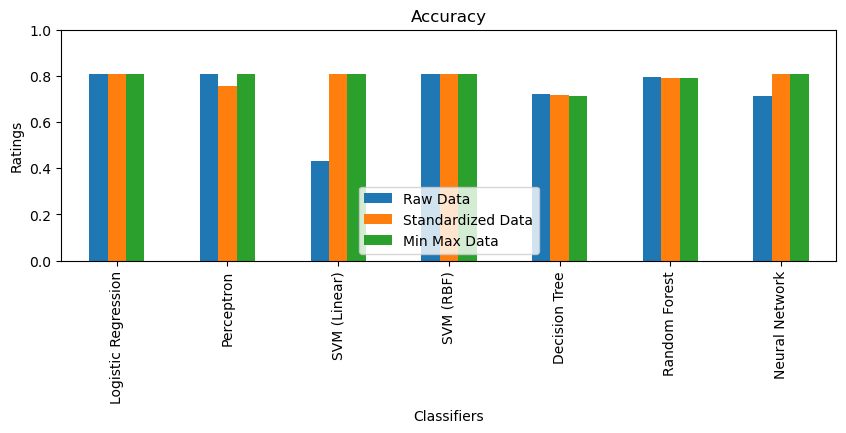

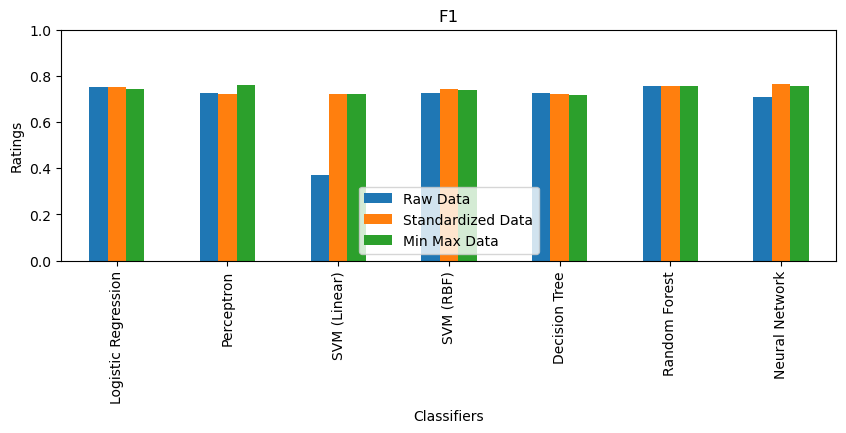

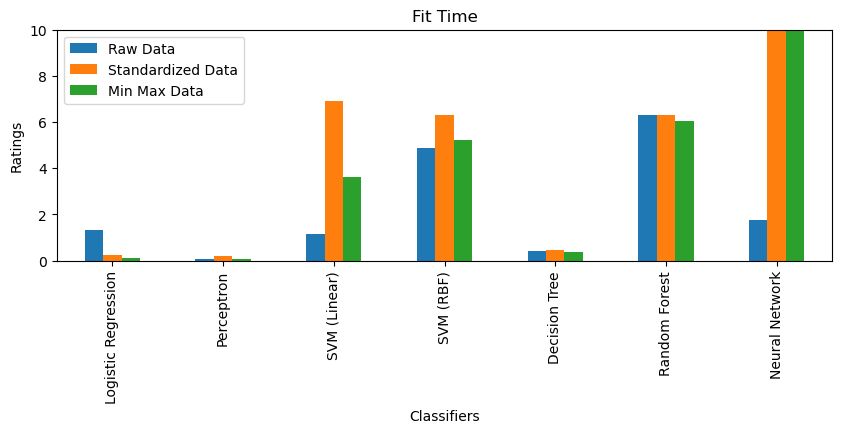

In [30]:
#Data Visualisation
#Set1 Accuracy
logistic_regression_acc_set1 = [cv_results['test_accuracy_score'].mean(),cv_resultsStandard['test_accuracy_score'].mean(),cv_resultsMinMax['test_accuracy_score'].mean()]
perceptron_acc_set1 = [cv_Results_perceptron['test_accuracy_score'].mean(),cv_resultsStandardPerceptron['test_accuracy_score'].mean(),cv_resultsMinMaxPerc['test_accuracy_score'].mean()]
svm_lin_acc_set1 = [cv_results_svm['test_accuracy_score'].mean(),cv_resultsStandardSVM['test_accuracy_score'].mean(),cv_resultsMinMaxSVM['test_accuracy_score'].mean()]
svm_rbf_acc_set1 = [cv_results_svm_rbf['test_accuracy_score'].mean(),cv_resultsStandardSVMrbf['test_accuracy_score'].mean(),cv_resultsMinMaxSVMRBF['test_accuracy_score'].mean()]
dec_tree_acc_set1 = [cv_results_dec_tree['test_accuracy_score'].mean(),cv_resultsStandardDecTree['test_accuracy_score'].mean(),cv_resultsMinMaxDecTree['test_accuracy_score'].mean()]
rforest_acc_set1 = [cv_results_random_forest['test_accuracy_score'].mean(),cv_resultsStandardRFor['test_accuracy_score'].mean(),cv_resultsMinMaxRFor['test_accuracy_score'].mean()]
mlp_acc_set1 = [cv_results_ffn['test_accuracy_score'].mean(),cv_resultsStandardMLP['test_accuracy_score'].mean(),cv_resultsMinMaxMLP['test_accuracy_score'].mean()]

classifiers = ['Logistic Regression', 'Perceptron', 'SVM (Linear)', 'SVM (RBF)', 'Decision Tree', 'Random Forest', 'Neural Network']

raw_data_accuracies = [
    logistic_regression_acc_set1[0], perceptron_acc_set1[0], svm_lin_acc_set1[0], svm_rbf_acc_set1[0],
    dec_tree_acc_set1[0], rforest_acc_set1[0], mlp_acc_set1[0]
]

standard_scaling_accuracies = [
    logistic_regression_acc_set1[1], perceptron_acc_set1[1], svm_lin_acc_set1[1], svm_rbf_acc_set1[1],
    dec_tree_acc_set1[1], rforest_acc_set1[1], mlp_acc_set1[1]
]

min_max_scaling_accuracies = [
    logistic_regression_acc_set1[2], perceptron_acc_set1[2], svm_lin_acc_set1[2], svm_rbf_acc_set1[2],
    dec_tree_acc_set1[2], rforest_acc_set1[2], mlp_acc_set1[2]
]

plotdata = pd.DataFrame({

    "Raw Data":raw_data_accuracies,

    "Standardized Data":standard_scaling_accuracies,

    "Min Max Data":min_max_scaling_accuracies},
                       
    index = ['Logistic Regression', 'Perceptron', 'SVM (Linear)', 'SVM (RBF)', 'Decision Tree', 'Random Forest', 'Neural Network']
                       )

ax=plotdata.plot(kind="bar",figsize=(10, 3))
ax.set_ylim([0, 1])

plt.title("Accuracy")

plt.xlabel("Classifiers")

plt.ylabel("Ratings")


#Set1 F1-Score

raw_data_f1 = [cv_results['test_f1_score'].mean(),
               cv_Results_perceptron['test_f1_score'].mean(),
               cv_results_svm['test_f1_score'].mean(),
               cv_results_svm_rbf['test_f1_score'].mean(),
               cv_results_dec_tree['test_f1_score'].mean(),
               cv_results_random_forest['test_f1_score'].mean(),
               cv_results_ffn['test_f1_score'].mean()]

standard_data_f1 = [cv_resultsStandard['test_f1_score'].mean(),
               cv_resultsStandardPerceptron['test_f1_score'].mean(),
               cv_resultsStandardSVM['test_f1_score'].mean(),
               cv_resultsStandardSVMrbf['test_f1_score'].mean(),
               cv_resultsStandardDecTree['test_f1_score'].mean(),
               cv_resultsStandardRFor['test_f1_score'].mean(),
               cv_resultsStandardMLP['test_f1_score'].mean()]

minmax_data_f1 = [cv_resultsMinMax['test_f1_score'].mean(),
               cv_resultsMinMaxPerc['test_f1_score'].mean(),
               cv_resultsMinMaxSVM['test_f1_score'].mean(),
               cv_resultsMinMaxSVMRBF['test_f1_score'].mean(),
               cv_resultsMinMaxDecTree['test_f1_score'].mean(),
               cv_resultsMinMaxRFor['test_f1_score'].mean(),
               cv_resultsMinMaxMLP['test_f1_score'].mean()]

plotdataF1 = pd.DataFrame({

    "Raw Data":raw_data_f1,

    "Standardized Data":standard_data_f1,

    "Min Max Data":minmax_data_f1},
                       
    index = ['Logistic Regression', 'Perceptron', 'SVM (Linear)', 'SVM (RBF)', 'Decision Tree', 'Random Forest', 'Neural Network']
                       )

ax1=plotdataF1.plot(kind="bar",figsize=(10, 3))
ax1.set_ylim([0, 1])

plt.title("F1")

plt.xlabel("Classifiers")

plt.ylabel("Ratings")


#Set1 Fit - Time 
raw_data_ft = [cv_results['fit_time'].mean(),
               cv_Results_perceptron['fit_time'].mean(),
               cv_results_svm['fit_time'].mean(),
               cv_results_svm_rbf['fit_time'].mean(),
               cv_results_dec_tree['fit_time'].mean(),
               cv_results_random_forest['fit_time'].mean(),
               cv_results_ffn['fit_time'].mean()]

standard_data_ft = [cv_resultsStandard['fit_time'].mean(),
               cv_resultsStandardPerceptron['fit_time'].mean(),
               cv_resultsStandardSVM['fit_time'].mean(),
               cv_resultsStandardSVMrbf['fit_time'].mean(),
               cv_resultsStandardDecTree['fit_time'].mean(),
               cv_resultsStandardRFor['fit_time'].mean(),
               cv_resultsStandardMLP['fit_time'].mean()]

minmax_data_ft = [cv_resultsMinMax['fit_time'].mean(),
               cv_resultsMinMaxPerc['fit_time'].mean(),
               cv_resultsMinMaxSVM['fit_time'].mean(),
               cv_resultsMinMaxSVMRBF['fit_time'].mean(),
               cv_resultsMinMaxDecTree['fit_time'].mean(),
               cv_resultsMinMaxRFor['fit_time'].mean(),
               cv_resultsMinMaxMLP['fit_time'].mean()]

plotdataFtime = pd.DataFrame({

    "Raw Data":raw_data_ft,

    "Standardized Data":standard_data_ft,

    "Min Max Data":minmax_data_ft},
                       
    index = ['Logistic Regression', 'Perceptron', 'SVM (Linear)', 'SVM (RBF)', 'Decision Tree', 'Random Forest', 'Neural Network']
                       )

ax2=plotdataFtime.plot(kind="bar",figsize=(10, 3))
ax2.set_ylim([0, 10])

plt.title("Fit Time")

plt.xlabel("Classifiers")

plt.ylabel("Ratings")
